# Flickr REST API: Get information from photos, get and plot photos

## Libraries and Settings

In [25]:
# Libraries
import os
import random
import fnmatch
import pandas as pd
import urllib.request
from flickrapi import FlickrAPI
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Settings
import warnings
warnings.filterwarnings("ignore")

# Current working directory
print(f'Current working directory: {os.getcwd()}')

Current working directory: u:\Lektionen\Scientific_Programming_FS2023\scientific_programming\Week_07\exercises


## Flickr WEB API Settings

In [26]:
# Keys for flickr API
FLICKR_PUBLIC = 'c6a2c45591d4973ff525042472446ca2'
FLICKR_SECRET = '202ffe6f387ce29b'

# Settings (extras = different resolution of photos)
flickr = FlickrAPI(FLICKR_PUBLIC, FLICKR_SECRET, format='parsed-json')
extras = 'url_sq,url_t,url_s,url_q,url_m,url_n,url_z,url_c,url_l,url_o'

# Get information about photos using the flickr API
cont = flickr.photos.search(text='yellow flowers', per_page=5, extras=extras)
photos = cont['photos']

# Object type
print(type(photos))

# Print keys of dictionary
print(photos.keys())

# Print values
df = pd.DataFrame.from_dict(photos)
df

<class 'dict'>
dict_keys(['page', 'pages', 'perpage', 'total', 'photo'])


,page,pages,perpage,total,photo
0,1,11823,5,59114,"{'id': '52794210572', 'owner': '9795006@N08', ..."
1,1,11823,5,59114,"{'id': '52795216268', 'owner': '9795006@N08', ..."
2,1,11823,5,59114,"{'id': '52794151291', 'owner': '141788246@N08'..."
3,1,11823,5,59114,"{'id': '52792743157', 'owner': '188643685@N08'..."
4,1,11823,5,59114,"{'id': '52791883680', 'owner': '50203050@N00',..."


## Get info about photos

In [27]:
# Derive information about the first photo
photo_01 = photos["photo"][0]

try:
    from pprint import pprint
    pprint(photo_01)
except:
    print(photo_01)

{'farm': 66,
 'height_c': 800,
 'height_l': 1024,
 'height_m': 500,
 'height_n': 320,
 'height_o': 5472,
 'height_q': 150,
 'height_s': 240,
 'height_sq': 75,
 'height_t': 100,
 'height_z': 640,
 'id': '52794210572',
 'isfamily': 0,
 'isfriend': 0,
 'ispublic': 1,
 'owner': '9795006@N08',
 'secret': '762c3a79cd',
 'server': '65535',
 'title': "Heliconia psittacorum L.f. Heliconiaceae - Parrot's Beak, "
          'พุทธรักษาญี่ปุ่น 1',
 'url_c': 'https://live.staticflickr.com/65535/52794210572_762c3a79cd_c.jpg',
 'url_l': 'https://live.staticflickr.com/65535/52794210572_762c3a79cd_b.jpg',
 'url_m': 'https://live.staticflickr.com/65535/52794210572_762c3a79cd.jpg',
 'url_n': 'https://live.staticflickr.com/65535/52794210572_762c3a79cd_n.jpg',
 'url_o': 'https://live.staticflickr.com/65535/52794210572_b31515ce0b_o.jpg',
 'url_q': 'https://live.staticflickr.com/65535/52794210572_762c3a79cd_q.jpg',
 'url_s': 'https://live.staticflickr.com/65535/52794210572_762c3a79cd_m.jpg',
 'url_sq': 'https:

## Download and plot photos

### Single photo

In [28]:
# Photo url
url = photo_01["url_m"]
url

'https://live.staticflickr.com/65535/52794210572_762c3a79cd.jpg'

In [29]:
# Download single photo
urllib.request.urlretrieve(url, 'photo_01.jpg')

('photo_01.jpg', <http.client.HTTPMessage at 0x1a9cd01f640>)

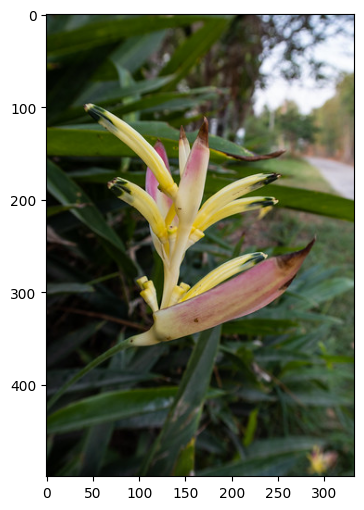

In [30]:
# Plot photo
img = mpimg.imread('photo_01.jpg')
plt.figure(figsize=(6,6))
imgplot = plt.imshow(img)

### Function to print all photos from the list

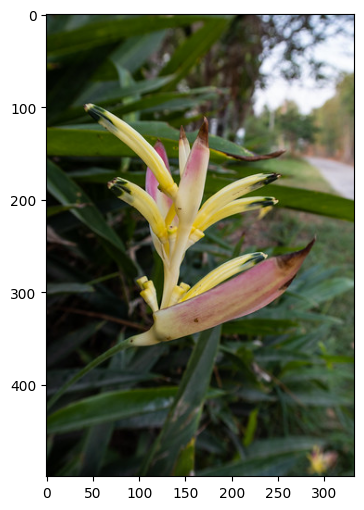

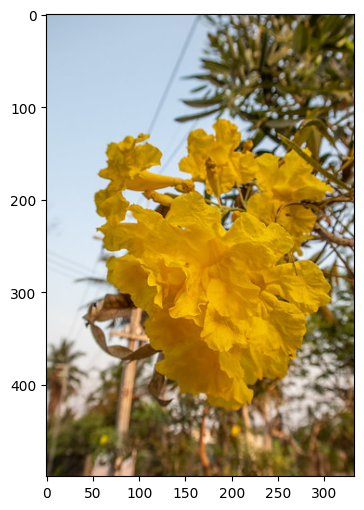

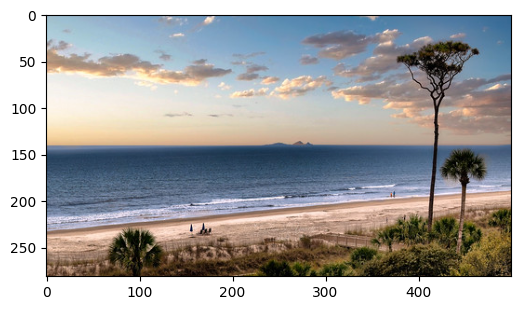

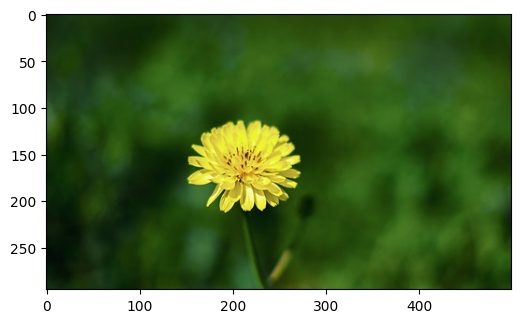

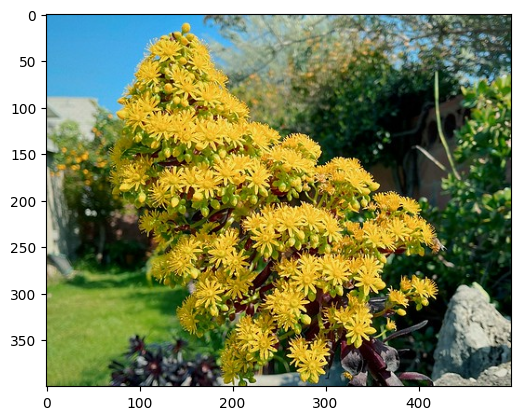

In [31]:
def print_photos():

    for photo in photos["photo"]:
        try:
            # Url
            url = photo["url_m"]
            # Download
            urllib.request.urlretrieve(url, 'photo.jpg')
            # Plot
            img = mpimg.imread('photo.jpg')
            plt.figure(figsize=(6,6))
            imgplot = plt.imshow(img)
        except:
            pass

# Funtion call
print_photos()

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [32]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
NT
Windows | 10
Datetime: 2023-04-05 16:50:50
Python Version: 3.10.9
-----------------------------------
